In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import control as co
from control.matlab import *
from scipy import signal
from IPython.display import Image
from IPython.core.display import HTML 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


![logo](img/upp2.png)
# **Universidad Politécnica de Puebla (JJVS 2022)**
# Control automático

# Espacio de estados (variables de estado)
## Modelado matemático de un motor de CD

Un motor de CD se modela considerando las partes eléctrica y mecánica. Como se sabe un motor esta compuesto de un embobinado que presenta una resistencia (R) e inductancia (L). Por otra parte se genera un voltaje contraelectromotriz $e(t)$ que está en función de la velocidad del motor $\omega$ y el flujo electromagnético $\phi$. Para modelar la parte mecánica se considera el coeficiente de inercia del eje del motor *J* y el par de carga $T_L$.

<img src="img/motorCDv20.png" width="500px"> 

Las ecuaciones que describen el modelo del motor, están determinadas por la **parte eléctrica**:

\begin{eqnarray}
	v(t)&=&Ri(t)+L\frac{di(t)}{dt}+e(t)\\
    T_m(t)&=&J\frac{d\omega(t)}{dt}+B\omega(t)+T_L(t)
\end{eqnarray}

<img src="img/motorCDv20.png" width="500px"> 

donde $v(t)$ es el voltaje aplicado al motor, $e(t)$ es el voltaje electromotriz inducido durante rotación del motor, $i(t)$ es la corriente del motor, $B$ el coeficiente de fricción, $R$ y $L$ la resistencia e inductancia del embobinado, respectivamente.



El voltaje de fuerza electromotriz del motor esta en función de la velocidad del motor $\omega$ y la constante $K_m$ del motor: 

\begin{equation}
e(t)=K_m \omega (t) 
\end{equation}

Por otra parte el par del motor está  determinado por:   

\begin{equation}
T_m(t)=K_m i(t)
\end{equation}

Al sustituir las ecuaciones anteriores, se obtiene: 

\begin{eqnarray}
	v(t)=Ri(t)+L\frac{di(t)}{dt}+K_m\omega(t)\\
    K_mi(t)=J\frac{d\omega}{dt}+B\omega(t)+T_L(t)
\end{eqnarray}

despejando la derivada, 

\begin{eqnarray}
\frac{di(t)}{dt}&=&\frac{v(t)}{L}-\frac{K_m}{L}\omega(t)-\frac{R}{L}i(t)\\
\frac{d\omega(t)}{dt}&=&\frac{K_m}{J}i(t)-\frac{B}{J}\omega(t)-\frac{T_L(t)}{J}
\end{eqnarray}


## Representación en variables de estado 

Los sistemas dinámicos lineales, se pueden representar con variables de estado:

\begin{equation}
  \dot x=A \cdot x+ B \cdot u 
\end{equation} 

\begin{equation}
  y=C \cdot x
\end{equation} 


El punto sobre el vector $x$ representa la derivada de las variables de estado. Sustituyendo las ecuaciones (7) y (8) se tiene, con $T_L=0$:

\begin{equation}
	 \begin{bmatrix}
	  di(t)/{dt} \\
	  d\omega(t)/{dt}
	 \end{bmatrix}
	 =
	 \begin{bmatrix}
	 -R/L & -K_m/L\\
	 K_m/J &-B/J	 
	 \end{bmatrix}
	 \begin{bmatrix}
	  i(t) \\
	 \omega(t)
	 \end{bmatrix}
	 +
	 \begin{bmatrix}
	 1/L\\
	 0 
	 \end{bmatrix}
	 v(t)
\end{equation}

Haciendo un cambio de variable, $x_1=i(t)$ y $x_2=\omega(t)$, se obtiene:

\begin{equation}
	 \begin{bmatrix}
	  \dot{x}_1 \\
	  \dot{x}_2 
	 \end{bmatrix}
	 =
	 \begin{bmatrix}
	 -R/L & -K_m/L\\
	 K_m/J &-B/J	 
	 \end{bmatrix}
	 \begin{bmatrix}
	  x_1(t) \\
	 x_2(t)
	 \end{bmatrix}
	 +
	 \begin{bmatrix}
	 1/L\\
	 0 
	 \end{bmatrix}
	 v(t)
\end{equation}


### 3. Simulación con datos experimentales  

<img src="img/tab_valores.png" width="400px"> 

Sustituyendo los valores de la tabla anterior en (8), se obtiene:

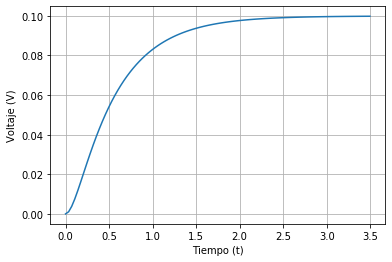

In [2]:
R=1; L=0.5; J=0.01; b=0.1; Km=0.01;

A=[[-R/L, -Km/L],[Km/J, -b/J]]
B=[[1/L],[0]]
C=[0,1]
D=0

sys2 = signal.StateSpace(A, B, C, D)

t2,y2=signal.step(sys2)

plt.plot(t2,y2)

plt.grid()
plt.xlabel('Tiempo (t)')
plt.ylabel('Voltaje (V)')

plt.show()

In [4]:
sys1 = ss2tf(A, B, C, D)
sys1

TransferFunction(array([2.]), array([ 1.  , 12.  , 20.02]))

In [5]:
sys_ss = ss(A, B, C, D)
sys_ss
pole(sys_ss)

array([-2.00250078, -9.99749922])

## Convertidor CD-CD (buck)

**Ejercicio 1**

Obtenga las ecuaciones de estado del siguiente convertidor CD-CD. Convertidor reductor buck. Los parámetros de los elementos son los siguientes: L= 1 mH, C=100 µF, R= 8.2Ω y E=12
Volts.
<img src="img/buck.png" width="400px"> 


<img src="img/buck_circ.png" width="400px"> 

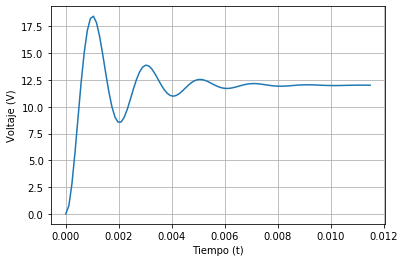

In [6]:
R=8.2; C=100e-6; L=1e-3; E=12; 

A=[[0, -1/L],[1/C, -1/(R*C)]]
B=[[E/L],[0]]
C=[0,1]
D=0

sys3 = signal.StateSpace(A, B, C, D)

t3,y3 = signal.step(sys3)

plt.plot(t3,y3)

plt.grid()
plt.xlabel('Tiempo (t)')
plt.ylabel('Voltaje (V)')

plt.show()


In [3]:
sys_ss = ss(A, B, C, D)
sys_ss
pole(sys_ss)

array([-2.00250078, -9.99749922])

In [7]:
p = [0.0000001, 0]
co.place(A, B, p)

matrix([[-0.10162597, -0.07093992]])

In [8]:
p = [-1000-1000j, -1000+1000j]
K=co.place(A, B, p)
K

matrix([[ 0.06504065, -0.07459845]])

## Linealización

Para linealizar un sistema no lineal alrededor de un punto de equilibrio, se emplean las siguientes matrices:

\begin{align}
\label{eq_linearA}
A^*=
\begin{bmatrix}
\partial{f_1}/\partial{x_1} &\partial{f_1}/{\partial{x_2}} &\partial{f_1}/{x_3}\\
\partial{f_2}/\partial{x_1} &\partial{f_2}/{\partial{x_2}} &\partial{f_2}/{x_3}\\
\partial{f_3}/\partial{x_1} &\partial{f_3}/{\partial{x_2}} &\partial{f_3}/{x_3}\\
\end{bmatrix}
\end{align}

\begin{align}
\label{eq_linearB}
B^*=
\begin{bmatrix}
\partial{f_1}/\partial{u}\\
\partial{f_2}/\partial{u}\\
\partial{f_3}/\partial{u}
\end{bmatrix}
\end{align}

Donde $f_1$ es la primera ecuación obtenida del modelado del sistema, $f_2$ la segunda ecuación, $f_3$ la tercera ecuación y $u$ la entrada.



**Ejercicio 2**

a) Obtener las ecuaciones que describan comportamiento no lineal del sistema.

b) Linealizar el modelo.

<img src="img/levmagv2.png" width="400px">


## Control mediante retroalimentación de estados
Considere el sistema definido por las ecuaciones de estado

\begin{equation}
  \dot x=A \cdot x+ B \cdot u 
\end{equation} 

\begin{equation}
  y=C \cdot x
\end{equation} 

	
Si se aplica la transformada de Laplace a la ecuación anterior se tiene:
\begin{equation}
sX(s)=AX(s)+BU(s)
\end{equation}
	
Despejando $X(s)$, se tiene:
\begin{equation}
sX(s)-AX(s)=BU(s)
\end{equation}

Y factorizando:
\begin{equation}
[sI-A]X(s)=BU(s)
\end{equation}
	
y despejando $X(s)$ se tiene:
\begin{equation}
	X(s)=[sI-A]^{-1}BU(s)
\end{equation}

De la ecuación anterior se tiene que la ecuación característica es:

\begin{equation}
    |sI-A|=0
\end{equation}

donde los eigenvalores del determinante, son los polos del sistema.

Si las variables de estado $x$ se retroalimentan, es decir se multiplican por una constante cada una de ellas y se conectan a la entrada, se obtiene el siguiente diagrama a bloques. Considerando que $r(t)=0$, al hacer la retroalimentación de las variables de estados, ahora se tiene que $u=-Kx$. 

<img src="img/retross2.png" width="700px"> 

Por lo que ahora la nueva ecuación de estado es:
\begin{equation}
  \dot x=A \cdot x - B \cdot (K \cdot x)
\end{equation} 

\begin{equation}
  y=C \cdot x
\end{equation} 



	
Si se aplica la transformada de Laplace a la ecuación anterior se tiene:
\begin{equation}
sX(s)=AX(s)-BKX(s)
\end{equation}
	
Despejando $X(s)$, se tiene:
\begin{equation}
sX(s)-AX(s)-BKX(s)=0
\end{equation}

La ecuación característica del sistema retroalimentado será:
\begin{equation}
|sI-A+BK|=0
\end{equation}

Para este caso los eigenvalores del sistema dependen de los valores de K. Es decir, la selección de estas constantes permitirán reubicar los polos del sistema. Es importante recordar que el sistema es estable si los polos se situan a la izquierda del plano S.

### Controlabilidad
Para aplicar el control por retroalimentación de estados el sistema debe ser controlable, esto se cumple sí y solo sí, la matriz 
\begin{equation}
{S}=[B\ \; AB \; A^2B \; \ldots \; A^{n-1}B]
\end{equation}
es de rango n. 
	
### Definición: Rango de una matriz
Es el orden del mayor determinante distinto de cero que se puede encontrar en el interior de una matriz determinada.
	
 
#### Teoremas de retroalimentación de estados
* Una condición necesaria y suficiente para la colocación arbitraria de los polos es que el sistema sea de estado completamente controlable.
* Si el par [**A,B**] es completamente controlable, existe una matriz ${K}$ que puede dar un conjunto arbitrario de valores característicos de $({A}-{B}{K})$; las $n$ raíces de la ecuación característica:

\begin{equation}
|s{I}-{A}+{B}{K}|
\end{equation}



**Ejercicio 2.1**
Determine si los siguientes sistemas son controlables.
\begin{eqnarray}
\begin{bmatrix}
\dot{x1} \\ \dot{x2}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 \\ 0 & -1
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 
\end{bmatrix}
+
\begin{bmatrix}
1  \\ 0
\end{bmatrix}
u
\end{eqnarray}
	
\begin{eqnarray}
\begin{bmatrix}
\dot{x1} \\ \dot{x2}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 \\ 2 & -1
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 
\end{bmatrix}
+
\begin{bmatrix}
0  \\ 1
\end{bmatrix}
u
\end{eqnarray}


**Ejercicio 3**

Diseñe un control por retroalimentación de estados para el siguiente sistema. 
<img src="img/buck.png" width="400px"> 
Se desea que los polos se ubiquen en s=-3000 $\pm$ j3000. Con E=12V, L=1mH, C=100$\mu$F, R=12.5$\Omega$. Emplee el comando:

co.place(A, B, p)

para obtener la matriz de ganancias K en función de la ubicación de los polos y pueda comparar con los cálculos realizados en su libreta.

**Ejercicio 4**

Diseñe un controlador por retroalimentación de estados del siguiente sistema 
\begin{equation}
G(s)=\frac{2500}{s(s+25)}
\end{equation}
para los polos se ubiquen en $s_1=-50$ y $s_2=-50$. 


**Hint:** 
La función de transferencia se puede representar como $G(S)=\frac{Y(s)}{R(s)}$. 

In [3]:
R=0.5; L = 10e-3; m = 20e-3; g = 9.8; x01 = 0.03;x03 = math.sqrt(m*g*x01);
A=[[0,1,0],[x03**2/(m*x01**2),0,-2*x03/(m*x01)],[0,0,-R/L]]
B=[[0],[0],[1/L]]
C=[1,0,0]
D=0

In [4]:
A

[[0, 1, 0], [326.6666666666667, 0, -255.60386016907756], [0, 0, -50.0]]

In [5]:
B

[[0], [0], [100.0]]

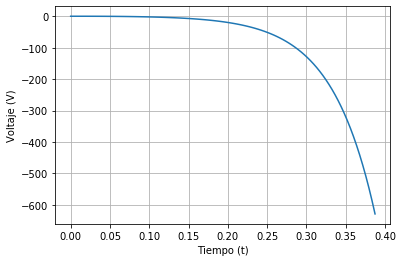

In [10]:
sys4 = signal.StateSpace(A, B, C, D)
t4,y4=signal.step(sys4)
plt.plot(t4,y4)
plt.grid()
plt.xlabel('Tiempo (t)')
plt.ylabel('Voltaje (V)')
plt.show()

In [11]:
sys_ss = ss(A, B, C, D)
sys_ss
pole(sys_ss)

array([ 18.07392228, -18.07392228, -50.        ])

**Ejercicio 5**

Realizar un control por retroalimentacion de estados para que el sistema sea estable, seleccione los polos en $s_1=-100$, $s_2=-100-100j$ y $s_3=-100+100j$. Obtenga sus conclusiones y muestre la simulación.
\begin{eqnarray}
A&=&
\begin{bmatrix}
0 & 1 & 0\\
x_{03}^2/mx_{01}^2 & 0 & -2x_{03}/mx_{01}\\
0 & 0 & -R/L
\end{bmatrix}\\
B&=&\begin{bmatrix}
0\\
0\\
1/L\\
\end{bmatrix}\\
C&=& \begin{bmatrix}
1~ & ~0 & 0\\
\end{bmatrix}
\end{eqnarray}
Con $x_{03}=\sqrt{mgx_{01}}$, R = 0.5$\Omega$, L = 10mH; m = 20mg; g = 9.8m/$s^2$; $x_{01}$ = 0.03 m. 



In [12]:
p = [-100-100j, -100+100j,-100]
K=co.place(A, B, p)
K

matrix([[-82.08013755,  -1.57770179,   2.5       ]])

A continuación convierta la ecuación al dominio del tiempo y obtenga el diagrama. 
<img src="img/diagrama_ssv2.png" width="600px">
De este diagrama pueden obtenerse las ecuaciones de estado. Las variables de estado se ubican en las salidas de los integradores, como puede observarse. Las ecuaciones de estado son las siguientes.


\begin{eqnarray}
\begin{bmatrix}
\dot{x1} \\ \dot{x2}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\ 0 & -25
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 
\end{bmatrix}
+
\begin{bmatrix}
0  \\ 2500
\end{bmatrix}
r(t)
\end{eqnarray}

In [13]:
A = [[0, 1], [0, -25]]
B = [[0], [2500]]
p = [-50, -49.9999]
co.place(A, B, p)

matrix([[0.999998  , 0.02999996]])

## Retroalimentación de estados con control integral
Para eliminar el error en estado estable se agrega un integrador y por otra parte se agrega la señal de referencia ($r(t) \neq 0$). De tal manera que aumentan en uno las variables de estado.

<img src="img/retroint.png" width="500px"> 
    
\begin{eqnarray}
\begin{bmatrix}
\dot{ {x}(t)}\\
\dot{x_{n+1}}\\
\end{bmatrix}
=\begin{bmatrix}
 {A} & 0\\
- {C} & 0\\
\end{bmatrix}
\begin{bmatrix}
 {x}(t)\\
x_{n+1}\\
\end{bmatrix}
+
\begin{bmatrix}
 {B}\\
 {-D}\\
\end{bmatrix}
u(t)
+
\begin{bmatrix}
 {0}\\
1\\
\end{bmatrix}
r(t)
\end{eqnarray}



ya que $u=-Kx-K_{n+1}x_{n+1}$

\begin{equation}
	\begin{bmatrix}
		\dot {x(t)}\\
		\dot{x_{n+1}}\\
	\end{bmatrix}
	=
	\begin{bmatrix}
		 A & 0\\
		- C & 0\\
	\end{bmatrix}
	\begin{bmatrix}
		 x(t)\\
		x_{n+1}\\
	\end{bmatrix}
	-
	\begin{bmatrix}
		 B\\
		 -D\\
	\end{bmatrix}
	\begin{bmatrix}
		 K & k_{n+1}\\
	\end{bmatrix}
	\begin{bmatrix}
		 x(t)\\
		x_{n+1}\\
	\end{bmatrix}
	+
	\begin{bmatrix}
		 0\\
		1\\
	\end{bmatrix}
	r(t)
\end{equation}
	


La ecuación de estado puede expresarse como:


\begin{equation}
\dot{\hat{ {x}}}=\hat{ {A}}\hat{ {x}}-\hat{ {B}} \hat{ {K}} \hat{ {x}}+
\begin{bmatrix}
 {0}\\
1\\
\end{bmatrix}
r(t)
\end{equation}
 


Y la ecuación característica para el sistema es:

\begin{equation}
|s{I}-\hat{A}+\hat{B}\hat{K}|=0
\end{equation}

donde:


\begin{eqnarray}
\hat{ {A}}=
\begin{bmatrix}
 {A} & 0\\
- {C} & 0\\
\end{bmatrix}, 
\hat{ {B}}=\begin{bmatrix}
 {B}\\
 {-D}\\
\end{bmatrix},
\hat{ {K}}=
\begin{matrix}
[k_1 & k_2 & k_3 \:  ... \: & k_{n+1}]
\end{matrix}
\end{eqnarray}
 


**Ejercicio 6**

Emplee la retroalimentación de estados con el control integral para diseñar un controlador para que los polos se ubiquen en -200, -30+j30, -30-j30 de la siguiente función : 
		
\begin{eqnarray}
A=
\begin{bmatrix}
0 & 1 \\
0 & 25 \\ 
\end{bmatrix} 
B=
\begin{bmatrix}
0  \\
1  \\
\end{bmatrix} \:
C=
\begin{bmatrix}
2500 & 0 
\end{bmatrix} 
\end{eqnarray}


**Ejercicio 7**

Diseñe un control por retroalimentación de estados con integrador para que el sistema de levitación magnética para que los polos se ubique en:  -100, -10, -150+j150, -150-j150.

**Ejercicio 8**				

Realice el controlador para el reductor (buck) para que los polos se ubiquen en -3000, -3000+j3000 y -3000-j3000. En PSIM realizar el circuito y el controlador.

In [27]:
R=0.5; L = 10e-3; m = 20e-3; g = 9.8; x01 = 0.03;x03 = math.sqrt(m*g*x01);
Ag=[[0,1,0,0],[x03**2/(m*x01**2),0,-2*x03/(m*x01),0],[0,0,-R/L,0],[-1,0,0,0]]
Bg=[[0],[0],[1/L],[0]]
Cg=[1,0,0,0]
Da=0

In [28]:
Ag

[[0, 1, 0, 0],
 [326.6666666666667, 0, -255.60386016907756, 0],
 [0, 0, -50.0, 0],
 [-1, 0, 0, 0]]

In [29]:
Bg

[[0], [0], [100.0], [0]]

In [30]:
p = [-100-100j, -100+100j,-100,-50]
K=co.place(Ag, Bg, p)
K

matrix([[-1.60965227e+02, -2.16454738e+00,  3.00000000e+00,
          3.91230398e+03]])

## Observabilidad
Un sistema es completamente observable si cada variable de estado del sistema afecta alguna de las salidas.
	
#### Teorema
Para que el sistema descrito por las ecuaciones: 

\begin{eqnarray}
\dot x = A \cdot  x + B \cdot u \\
y={C} \cdot x + D \cdot u
\end{eqnarray}

sea completamente observable es necesario y suficiente que la matriz:
\begin{eqnarray}
V=
\begin{bmatrix}
C & CA & CA^2 & \: ... \:CA^{n-1}
\end{bmatrix}
^T
\end{eqnarray}

sea de rango **n**.

**Ejercicio 9**

Determine si los siguientes sistemas son observables.
\begin{eqnarray}
A=
\begin{bmatrix}
-2 & 0 \\
0 & -1 \\ 
\end{bmatrix} 
B=
\begin{bmatrix}
3  \\
1  \\
\end{bmatrix} \:
C=
\begin{bmatrix}
1 & 0 
\end{bmatrix} 
\end{eqnarray}
	
\begin{eqnarray}
A=
	\begin{bmatrix}
	0 & 1 \\
	-2 & -3 \\ 
	\end{bmatrix} 
	B=
	\begin{bmatrix}
	1  \\
	1  \\
	\end{bmatrix} \:
	C=
	\begin{bmatrix}
	1 & 2 
	\end{bmatrix} 
	\end{eqnarray}
	
Para el sistema de levitación magnética calcule la observabilidad, si la salida es la posición, la velocidad o la corriente.
 

In [14]:
A = [[-2, 0], [0, -1]]
C = [1, 0]
O1=co.obsv(A,C)
O1

matrix([[ 1.,  0.],
        [-2.,  0.]])

In [15]:
A = [[0, 1], [-2, -3]]
C = [[1, 2]]
O2=co.obsv(A,C)
np.ptp(O2)

7.0

## Observador de orden completo
Para un sistema representado con variables de estado, se puede obtener un observador de orden completo de la siguiente forma:

\begin{equation}
  \dot {\tilde x} = A \tilde x + B u + k_e ( y - C \tilde x)
\end{equation}

<img src="img/obscom.png" width="400px"> 

El problema de diseñar un observador de orden completo está en determinar la matriz de ganancias del observador ${K}_e$ de forma que la dinámica del error sea asintóticamente estable con una velocidad de respuesta suficiente. \\
	
Restando el sistema original del observador se tiene:
\begin{equation}
\dot x - \dot {\tilde x} = {A}({x} - {\tilde {x}}) -{K}_e  C (x - {\tilde x})
\end{equation}
	
Los valores propios deseados de la ecuación característica se deben escoger de forma que el observador de estados responda de 2 a 5 veces más rápido que el sistema en lazo cerrado. La ecuación característica del observador es:
\begin{equation}
|s{I}-{A}+{K}_e {C}|=0
\end{equation}
 




**Ejercicio 10**
Considere el sistema representado mediante variables de estado, con:
\begin{eqnarray}
A=
\begin{bmatrix}
0 & 20.6 \\
1 & 0 \\ 
\end{bmatrix} 
\:
B=
\begin{bmatrix}
0 \\
1  \\
\end{bmatrix} \:
C=
\begin{bmatrix}
0 & 1 
\end{bmatrix} 
\end{eqnarray}
	
Determine la matriz de ganancias ${K}_e$ tal que los valores propios deseados de la matriz del observador sean $\gamma _1 =-5$ y $\gamma _2 =-5$. Considere que $u=-K \tilde x$.


**Ejercicio 11**

Considere el diseño de un regulador para el sistema representado mediante variables de estado, con:
\begin{equation}
A=
\begin{bmatrix}
0 & 1 \\
20.6 & 0 \\ 
\end{bmatrix} 
\:
B=
\begin{bmatrix}
0 \\
1  \\
\end{bmatrix} \:
C=
\begin{bmatrix}
1 & 0 
\end{bmatrix} 
\end{equation}

Los polos en lazo cerrado del sistema se desean en $s_{12}=-1.8 \pm j1.8$. Suponga un control por realimentación del estado observado.\\

\begin{equation}
    u=-K\tilde{x}
\end{equation}

con polos del observador en $s_1=-8$ y $s_2=-8$. Encuentre $K$ y $K_e$.


In [16]:
A = [[0, 20.6], [1, 0]]
B = [[0], [1]]
C = [0, 1]
p = [-5, -4.99]
co.place(A, B, p)

matrix([[2.21116505, 9.99      ]])

## Observador de orden mínimo
Algunas de las variables se pueden estimar a partir de una señal que puede ser medida; en otras palabras a partir de la señal medida se observan las otras señales. Considerando el caso en el que solo una variable de estado es medible, para el sistema:

\begin{equation}
    \dot{x} = A \cdot  x + B \cdot u \\
    y= C \cdot x + D \cdot u
\end{equation} 
 
La ecuación de estado puede reescribirse como:

\begin{equation}
    \dot{x}=
    \begin{bmatrix}
    \dot{x_a} \\
    \dot{{x}_b}
    \end{bmatrix}
    \begin{bmatrix}
    A_{aa} & {A}_{ab} \\
    {A}_{ba} & {A}_{bb}
    \end{bmatrix}
    \begin{bmatrix}
    x_a \\
    {x}_b
    \end{bmatrix}
    +
    \begin{bmatrix}
    B_a\\
    {B}_b
    \end{bmatrix}u
\end{equation}
	
\begin{eqnarray}
    y=
    \begin{bmatrix}
    1&0
    \end{bmatrix}
    \begin{bmatrix}
    x_a \\
    {x}_b
    \end{bmatrix}
\end{eqnarray}

de donde:
    
\begin{eqnarray}
\dot{x_a}=A_{aa}x_a+{A}_{ab}{x}_b+B_au\\
\dot{{x}_b}={A}_{ba}x_a+{A}_{bb}{x}_b+{B}_bu
\end{eqnarray}
 

 
\begin{eqnarray}
\dot{x_a}=A_{aa}x_a+{A}_{ab}{x}_b+B_au\\
\dot{{x}_b}={A}_{ba}x_a+{A}_{bb}{x}_b+{B}_bu
\end{eqnarray}

Con
\begin{equation}
y^*=\dot{x_a}-A_{aa}x_a-B_au\\ 
{C}^*={A}_{ab}\\ 
{B}^*u^*= {A}_{ba}x_a+{B}_bu
\end{equation}
Se tiene
\begin{eqnarray}
\dot{{x}_b}&=&{A}_{bb}{x}_b+{B}^*u^*\\
y^*&=&{C}^*{x}_b 
\end{eqnarray}
 

Sustituyendo con los cambios de variables realizados, se tiene: 
\begin{eqnarray}
\dot{{x}_b}&=&{A}_{bb}{x}_b+{A}_{ba}x_a+{B}_bu\\
\dot{{x}_b}&=&{A}_{bb}{x}_b+{B}^*u^*\\
\dot{x_a}-A_{aa}x_a-B_au&=&{A}_{ab}{x}_b\\% y^*&=&{C}^*{x}_b \\
\end{eqnarray}
	
Ahora considere la ecuación del observador de orden completo
\begin{equation}
\dot {\tilde x} = {A} \tilde x + {B}u+{K}_e(y- {C} \tilde x) = ({A}-{K}_e C )\tilde x + {B}u+ {K}_e y
\end{equation}

Haciendo cambios de variables 
$\tilde x =\tilde{{x}_b}$, ${A}={A}_{bb}$, ${C}={A}_{ab}$, ${B}{u}= {A}_{ba}x_a+{B}_bu$ y $y=\dot{x_a}-A_{aa}x_a-B_au$.
 

Después de sustituir se obtiene la ecuación:

\begin{equation}
\tilde { \dot x_b }=( A_{bb}-{K}_e A_{ab})\tilde {{x}_b}+ {A}_{ba}x_a+{B}_bu+{K}_e(\dot{x_a}-A_{aa}x_a-B_au)
\end{equation}
	
Al estimar $\tilde{ x_b}$ se requiere la derivada de $x_a$, pero si ésta señal es ruidosa, la derivada amplificaría el ruido. Para evitar la derivada se hace el cambio de variable $\tilde{\dot x_b}=\dot Z +{K}_e \dot{x_a}$ y se obtiene:
	
\begin{equation}
\dot{Z}=(A_{bb}-{K}_e A_{ab})\tilde {x_b}+ A_{ba} x_a + B_bu- K_e(A_{aa}x_a+B_au)
\end{equation}
	
Agrupando términos se tiene:

\begin{equation}
\dot{Z}=({A}_{bb}-{K}_e{A}_{ab}){Z}+ [({A}_{bb}- {K}_e{A}_{ab}){K}_e +{A}_{ba} -{K}_e Aaa]y  + ({B}_b-{K}_e{B}_a)u 
\end{equation}

Para obtener las variables observadas, es decir $\mathbf{\tilde{x}}_b$, se integra $\mathbf{Z}$ y se emplea la ecuación 

\begin{equation}
\tilde{x_b}=Z+K_e{x_a}
\end{equation}




**Ejercicio 12**

Para un motor de CD, con las siguientes parámetros :
$K_m=0.06$, $J_m=80.45e-6$, $L=0.003$, $R=3.13$, $B_m=20e-6$.

*  Obtenga su representación en variables de estado.
*  Diseñe un observador de orden mínimo para observar el par aplicado.
*  Seleccione los valores de la ubicación de los polos del observador y del motor (los valores empleados deben ser únicos, es decir no pueden repetir entre equipos).
